<a href="https://colab.research.google.com/github/pena-rodrigo/discount_factor/blob/main/discount_attractors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#@title Mount drive
# mount drive
from google.colab import drive
drive.mount('/content/gdrive')
images_dir = '/content/gdrive/MyDrive/hidehiko'

trialtype = np.loadtxt(f"{images_dir}/trialtype.dat")
responsetype = np.loadtxt(f"{images_dir}/responsetype.dat")
trialdelay = np.loadtxt(f"{images_dir}/trialdelay.dat")
amountlarge = np.loadtxt(f"{images_dir}/amountlarge.dat")
amountsmall = np.loadtxt(f"{images_dir}/amountsmall.dat")

In [ ]:
tau = 1
h = -5
wi = -7
wr = 6
a = 0
beta = 1

dt = 1
tf = 459

c = 0 #c>0 favor SS, c<0 favor LL
I=1

Iss = lambda c: I + c/2
Ill = lambda c: I - c/2

sigma = lambda u : 1. / (1 + np.exp(-beta*(u-a)))

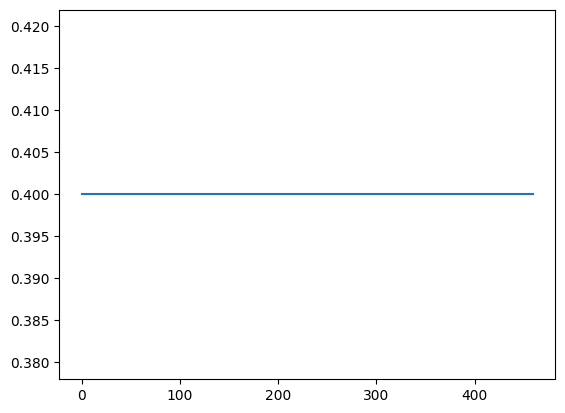

In [ ]:
plt.plot(amountsmall)

In [ ]:
# 1 small, 2 large
uss = 0
ull = 0
russ=[]
rull=[]
response_small = []
response_large = []
right_left = []
#c>0 favor SS, c<0 favor LL
ci = 8
c = ci
for i in range(tf):
    if(trialtype[i]==0):
      c =  10*amountsmall[i]#amountlarge[i]#/amountsmall[i] #+ (trialdelay[i] + amountlarge[i]/amountsmall[i])
    else:
      c = -10*amountlarge[i] + 2*trialdelay[i] #/amountsmall[i]
    uss = uss + dt*(-uss + h + wr*sigma(uss) + wi*sigma(ull) + Iss(c))/tau + 0.5*np.random.normal()*np.sqrt(dt)
    ull = ull + dt*(-ull + h + wr*sigma(ull) + wi*sigma(uss) + Ill(c))/tau + 0.5*np.random.normal()*np.sqrt(dt)
    russ.append(uss)
    rull.append(ull)
    if(ull<0 and uss>0): #small
      response_small.append(c)
    else:
      response_small.append(np.NaN)
    if(ull>0 and uss<0): #large
      response_large.append(c)
    else:
      response_large.append(np.NaN)
    right_left.append(c)

(-10.0, 10.0)

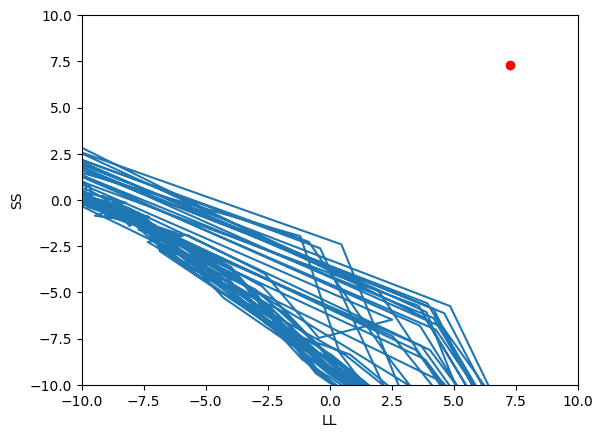

In [ ]:
plt.plot(rull,russ)
plt.plot(rull[0],rull[0],'ro')
plt.xlabel('LL')
plt.ylabel('SS')
plt.xlim([-10,10])
plt.ylim([-10,10])

In [ ]:
(trialdelay[i] - amountlarge[i]/amountsmall[i])

-4.0

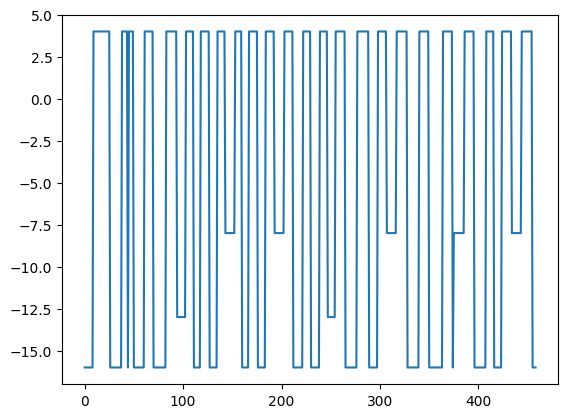

In [ ]:
plt.plot(right_left)
# plt.plot(response_small,'ro')
# plt.plot(response_large,'go')
# plt.xlim([00,100])


In [ ]:
comparelist = np.zeros(len(responsetype))
comparelist[np.where(np.asarray(response_large)>0)] = 2
comparelist[np.where(np.asarray(response_large)<0)] = 2
comparelist[np.where(np.asarray(response_small)>0)] = 1
comparelist[np.where(np.asarray(response_small)<0)] = 1
total = np.sum(responsetype==3) + np.sum(responsetype==0)
accuracy = np.sum(comparelist==responsetype)/(len(responsetype) - total)

print(accuracy)

0.3691275167785235


In [ ]:
plt.plot(right_left)
plt.plot(response_small,'ro')
plt.plot(response_large,'go')
plt.plot(trialdelay)
plt.plot(amountlarge/amountsmall)
plt.xlim([0,400])

NameError: ignored

In [ ]:
comparelist

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 0., 0., 0., 0., 1., 1., 2., 0., 0., 0., 0., 0., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 0., 0., 0., 0., 0., 1., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0.,
       0., 0., 0., 0., 0., 1., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       0., 0., 0., 0., 0., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 0., 0.

In [ ]:
responsetype

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 1., 2., 2.,
       2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 3., 2., 2., 2., 2., 2., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2.,
       2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2.,
       2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 1.,
       1., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 3.,
       1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1.,
       2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 1.,
       1., 1., 2., 2., 2.

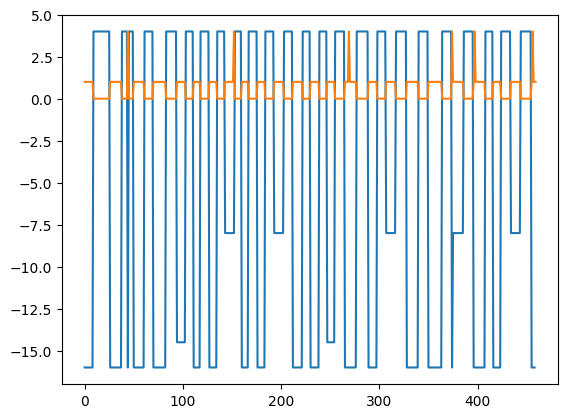

In [ ]:
plt.plot(right_left)
plt.plot(trialtype)